# Random Forest

In [29]:
#Import modules
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [22]:
#Split X and y 
X = df[features_0]
y = condom_use

In [24]:
#Train Test Split and Standard Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [25]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())
print('--------------------')
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Synthetic sample class distribution: 

3.0    22755
2.0    22755
1.0    22755
Name: Condom use, dtype: int64
--------------------
3.0    0.333333
2.0    0.333333
1.0    0.333333
Name: Condom use, dtype: float64


In [34]:
#Instantiate model
rfc = RandomForestClassifier(random_state=42, max_depth=5)

In [35]:
#fit the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [37]:
#use the fitted model to predict on the test data
rfc_preds_test = rfc.predict(X_test)
rfc_preds_train = rfc.predict(X_train)
rfc_f1_test = metrics.f1_score(y_test, rfc_preds_test,average = 'weighted')
rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train,average = 'weighted')
rfc_acc_test = metrics.accuracy_score(y_test, rfc_preds_test)
rfc_acc_train = metrics.accuracy_score(y_train, rfc_preds_train)
# checking accuracy on the test data
print('Test F1 score test: ', rfc_f1_test)
print('Test Accuracy score test: ', rfc_acc_test)

print('Test F1 score test train: ', rfc_f1_train)
print('Test Accuracy score train: ', rfc_acc_train)

Test F1 score test:  0.8381976794095654
Test Accuracy score test:  0.8398446253828341
Test F1 score test train:  0.8431627640125784
Test Accuracy score train:  0.8447996812828366


In [42]:
#Now with cross validation search
val = cross_val_score(RandomForestClassifier(random_state=42),X_train_resampled, y_train_resampled,cv=5)
val.mean()

0.9154325056764081

In [41]:
rfc.score(X_test, y_test)

0.8398446253828341

[[7497    0    0]
 [   0 2591  956]
 [   1 1187 1155]]


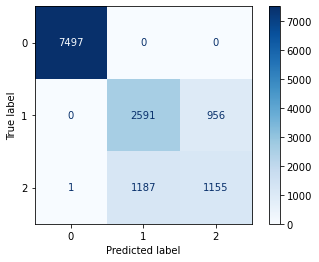

In [39]:
cm = confusion_matrix(y_test, rfc_preds_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()